<a href="https://colab.research.google.com/github/SUSHOVAN95/ML-Assignments/blob/main/ASSGN6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import bz2
import re
import os
import matplotlib.pyplot as plt
import string
from collections import Counter 
from random import shuffle


In [ ]:
trainFile='/content/gdrive/My Drive/test.ft.txt.bz2'
file=bz2.BZ2File(trainFile,'r')
df = pd.read_table(file,names = ('Review_text','y'))

In [ ]:
df.head()

,Review_text,y
0,__label__2 Great CD: My lovely Pat has one of ...,NaN
1,__label__2 One of the best game music soundtra...,NaN
2,__label__1 Batteries died within a year ...: I...,NaN
3,"__label__2 works fine, but Maha Energy is bett...",NaN
4,__label__2 Great for the non-audiophile: Revie...,NaN


In [ ]:
df['Class'] = df['Review_text'].str.split(' ').str[0]

In [ ]:
df.head()

,Review_text,y,Class
0,__label__2 Great CD: My lovely Pat has one of ...,NaN,__label__2
1,__label__2 One of the best game music soundtra...,NaN,__label__2
2,__label__1 Batteries died within a year ...: I...,NaN,__label__1
3,"__label__2 works fine, but Maha Energy is bett...",NaN,__label__2
4,__label__2 Great for the non-audiophile: Revie...,NaN,__label__2


In [ ]:
df = df.drop(['y'],axis = 1)

In [ ]:
df['Review_text'] = df['Review_text'].str.replace('__label__1','')
df['Review_text'] = df['Review_text'].str.replace('__label__2','')
df['Class'] = df['Class'].str.replace('__label__','')

In [ ]:
df.head()

,Review_text,Class
0,Great CD: My lovely Pat has one of the GREAT ...,2
1,One of the best game music soundtracks - for ...,2
2,Batteries died within a year ...: I bought th...,1
3,"works fine, but Maha Energy is better: Check ...",2
4,Great for the non-audiophile: Reviewed quite ...,2


In [ ]:
df['Class'] = df['Class'].str.replace('1','0')
df['Class'] = df['Class'].str.replace('2','1')

In [ ]:
df.head()

,Review_text,Class
0,Great CD: My lovely Pat has one of the GREAT ...,1
1,One of the best game music soundtracks - for ...,1
2,Batteries died within a year ...: I bought th...,0
3,"works fine, but Maha Energy is better: Check ...",1
4,Great for the non-audiophile: Reviewed quite ...,1


In [ ]:
from string import punctuation

def punctuation_remove(s):
    return ''.join(c for c in s if c not in punctuation)

df['Review_text'] = df['Review_text'].apply(lambda s: punctuation_remove(s).strip())
df['Review_text'] = df['Review_text'].apply(lambda s: s.lower())

In [ ]:
import numpy as np
wlen = pd.Series(np.random.randn(len(df['Review_text'])))
for i in range(len(df)):
  wlen[i]=len(df['Review_text'][i].split())
df = df.assign(wlen=wlen.values)

In [ ]:
df.head()

,Review_text,Class,wlen
0,great cd my lovely pat has one of the great vo...,1,105.0
1,one of the best game music soundtracks for a ...,1,147.0
2,batteries died within a year i bought this ch...,0,59.0
3,works fine but maha energy is better check out...,1,37.0
4,great for the nonaudiophile reviewed quite a b...,1,69.0


In [ ]:
df = df.drop(df[df.wlen > 25].index).reset_index(drop=True)

In [ ]:
df.head()

,Review_text,Class,wlen
0,long and boring ive read this book with much e...,0,19.0
1,amazing love itvery touchits to bad that in th...,1,15.0
2,no another grill like this this grill is one o...,1,24.0
3,creepy the creepiest book ive ever read its a ...,1,22.0
4,possibly the funniest movie ever made it start...,1,22.0


In [ ]:
occurance = {}
for i in range(0,len(df)-1):
  for w in df['Review_text'][i].split():
    if w in occurance:
       occurance[w] += 1
    else:
       occurance[w] = 1

In [ ]:
print(occurance)

{'long': 442, 'and': 14766, 'boring': 505, 'ive': 441, 'read': 1708, 'this': 13929, 'book': 4975, 'with': 4015, 'much': 1159, 'expectation': 17, 'it': 14302, 'was': 6448, 'very': 5120, 'all': 2351, 'through': 264, 'out': 1122, 'the': 22365, 'amazing': 430, 'love': 2334, 'itvery': 9, 'touchits': 1, 'to': 11490, 'bad': 887, 'that': 2667, 'in': 5580, 'dvd': 852, 'description': 146, 'doesnt': 540, 'mention': 18, 'no': 1654, 'subtitles': 42, 'another': 509, 'grill': 33, 'like': 2233, 'is': 10549, 'one': 2691, 'of': 8404, 'its': 2139, 'kindit': 1, 'can': 1013, 'be': 1949, 'use': 1179, 'anywhere': 61, 'without': 329, 'so': 1963, 'hard': 453, 'workit': 2, 'fits': 138, 'snugly': 1, 'creepy': 17, 'creepiest': 1, 'ever': 817, 'a': 13624, 'mysteryromance': 1, 'i': 14444, 'would': 1998, 'again': 925, 'lol': 29, 'possibly': 27, 'funniest': 27, 'movie': 2608, 'made': 694, 'starts': 18, 'off': 443, 'bit': 264, 'slow': 173, 'but': 3601, 'once': 181, 'product': 2687, 'placement': 4, 'jokes': 12, 'start'

In [ ]:
new = []
new = {w:occurance[w] for w in occurance if occurance[w] >= 5}

In [ ]:
print(new)

{'long': 442, 'and': 14766, 'boring': 505, 'ive': 441, 'read': 1708, 'this': 13929, 'book': 4975, 'with': 4015, 'much': 1159, 'expectation': 17, 'it': 14302, 'was': 6448, 'very': 5120, 'all': 2351, 'through': 264, 'out': 1122, 'the': 22365, 'amazing': 430, 'love': 2334, 'itvery': 9, 'to': 11490, 'bad': 887, 'that': 2667, 'in': 5580, 'dvd': 852, 'description': 146, 'doesnt': 540, 'mention': 18, 'no': 1654, 'subtitles': 42, 'another': 509, 'grill': 33, 'like': 2233, 'is': 10549, 'one': 2691, 'of': 8404, 'its': 2139, 'can': 1013, 'be': 1949, 'use': 1179, 'anywhere': 61, 'without': 329, 'so': 1963, 'hard': 453, 'fits': 138, 'creepy': 17, 'ever': 817, 'a': 13624, 'i': 14444, 'would': 1998, 'again': 925, 'lol': 29, 'possibly': 27, 'funniest': 27, 'movie': 2608, 'made': 694, 'starts': 18, 'off': 443, 'bit': 264, 'slow': 173, 'but': 3601, 'once': 181, 'product': 2687, 'jokes': 12, 'start': 132, 'takes': 111, '80s': 42, 'rock': 136, 'bands': 25, 'capture': 9, 'my': 5043, 'ears': 38, 'they': 160

In [ ]:
# Preparing words to index mappings

index = 2
vocab2id = {}
vocab2id['<PAD>'] = 0
vocab2id['<_UNK>'] = 1
for i in new.keys():
  vocab2id[i] = index
  index += 1

In [ ]:
print(vocab2id)

{'<PAD>': 0, '<_UNK>': 1, 'long': 2, 'and': 3, 'boring': 4, 'ive': 5, 'read': 6, 'this': 7, 'book': 8, 'with': 9, 'much': 10, 'expectation': 11, 'it': 12, 'was': 13, 'very': 14, 'all': 15, 'through': 16, 'out': 17, 'the': 18, 'amazing': 19, 'love': 20, 'itvery': 21, 'to': 22, 'bad': 23, 'that': 24, 'in': 25, 'dvd': 26, 'description': 27, 'doesnt': 28, 'mention': 29, 'no': 30, 'subtitles': 31, 'another': 32, 'grill': 33, 'like': 34, 'is': 35, 'one': 36, 'of': 37, 'its': 38, 'can': 39, 'be': 40, 'use': 41, 'anywhere': 42, 'without': 43, 'so': 44, 'hard': 45, 'fits': 46, 'creepy': 47, 'ever': 48, 'a': 49, 'i': 50, 'would': 51, 'again': 52, 'lol': 53, 'possibly': 54, 'funniest': 55, 'movie': 56, 'made': 57, 'starts': 58, 'off': 59, 'bit': 60, 'slow': 61, 'but': 62, 'once': 63, 'product': 64, 'jokes': 65, 'start': 66, 'takes': 67, '80s': 68, 'rock': 69, 'bands': 70, 'capture': 71, 'my': 72, 'ears': 73, 'they': 74, 'are': 75, 'almost': 76, 'soon': 77, 'charlie': 78, 'brown': 79, 'christmas':

In [ ]:
import numpy as np

In [ ]:
# creating a dictionary mapping from word to glove vector
import os
temp = {}

with open(os.path.join('/content/gdrive/My Drive/', 'glove.6B.100d.txt')) as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        temp[word] = coefs

In [ ]:
# For the values which are not in glove but are in vocab, creating a vector of size 100 in range -0.5 to 0.5
embedding = {}
for keys in vocab2id.keys():
  if keys in temp.keys():
    embedding[keys] = temp[keys]
  else:
    embedding[keys] = np.random.uniform(-0.5,0.5,size=(100,))

In [ ]:
# creating index vector for the sentences
X = []
for i in range(len(df)):
  words = df['Review_text'][i].split()
  lists = []
  for w in words:
    if w in vocab2id.keys():
      lists.append(vocab2id[w])
    else:
      lists.append(vocab2id['<_UNK>'])
  X.append(lists)

In [ ]:
print(X)

[[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 4, 15, 16, 17, 18, 8], [19, 20, 21, 1, 22, 23, 24, 25, 18, 26, 27, 28, 29, 30, 31], [30, 32, 33, 34, 7, 7, 33, 35, 36, 37, 38, 1, 39, 40, 41, 42, 43, 44, 10, 45, 1, 46, 1, 42], [47, 18, 1, 8, 5, 48, 6, 38, 49, 47, 1, 15, 25, 36, 47, 8, 50, 51, 6, 12, 52, 53], [54, 18, 55, 56, 48, 57, 12, 58, 59, 49, 60, 61, 62, 63, 18, 64, 1, 65, 66, 12, 67, 59], [68, 45, 69, 36, 37, 18, 68, 69, 70, 24, 71, 72, 73, 38, 1, 24, 74, 75, 76, 1, 77], [78, 79, 80, 36, 37, 72, 81, 80, 82, 37, 15, 83, 84, 85, 86, 18, 87], [88, 49, 89, 1, 90, 91, 92, 37, 1, 93, 3, 1, 94, 95, 96, 97], [44, 10, 98, 99, 18, 100, 101, 50, 20, 12, 38, 2, 3, 18, 102, 35, 103, 3, 12, 28, 104, 105, 38, 106], [107, 108, 109, 107, 110, 3, 111, 1, 112, 98, 113, 18, 114, 115, 116, 1, 1], [117, 12, 118, 119, 7, 120, 84, 72, 121, 35, 122, 123, 124, 18, 1, 44, 125, 49, 108, 126, 22, 12], [127, 128, 129, 7, 130, 96, 131, 9, 15, 18, 132, 133, 134, 135, 49, 98, 136, 9, 1, 137, 12], [138, 139, 140, 13

In [ ]:
# pre-padding with zero for the sentences of length less than 25

from keras.preprocessing.sequence import pad_sequences
X = pad_sequences(X, maxlen=25,padding='pre')

Using TensorFlow backend.


In [ ]:
print(X[0])

[ 0  0  0  0  0  0  2  3  4  5  6  7  8  9 10 11 12 13 14  4 15 16 17 18
  8]


In [ ]:
# creating reverse dictionary

id2vocab = {v: k for k, v in vocab2id.items()}
embedded_mat = []

In [ ]:
# creating embedding matrix
for i in range(len(id2vocab)):
  embedded_mat.append(embedding[id2vocab[i]])

In [ ]:
Y = df['Class'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_temp, y_train, y_temp = train_test_split(X,Y, test_size = 0.2, random_state=42)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp,y_temp, test_size = 0.5, random_state=42)

In [ ]:
batch_size = 64
learning_rate = 0.001
number_of_words = len(vocab2id)
embed_size = 100
epochs = 50

In [ ]:
import tensorflow as tf
tf.reset_default_graph()

In [ ]:
x = tf.placeholder(tf.int32, [None, None], name='inputs')
y_true = tf.placeholder(tf.int32, [None, None], name='targets')

In [ ]:
# performing embedding lookup between word from embedded matrix and inputs 
embedded_mat = np.asarray(embedded_mat, np.float32)
word_embeddings = tf.convert_to_tensor(embedded_mat)
embed = tf.nn.embedding_lookup(word_embeddings,x)

In [ ]:
# creating two hidden layers and initializing the cell
hidden_layers = [tf.nn.rnn_cell.LSTMCell(s) for s in [256, 512]]
cell = tf.contrib.rnn.MultiRNNCell(hidden_layers)
init_state = cell.zero_state(batch_size, tf.float32)

In [ ]:
outputs, states = tf.nn.dynamic_rnn(cell, embed, initial_state=init_state)

In [ ]:
y_pred = tf.layers.dense(outputs[:, -1], 1, activation=tf.sigmoid)
loss = tf.losses.mean_squared_error(y_true, y_pred)

optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [ ]:
correct_pred = tf.equal(tf.cast(tf.round(y_pred), tf.int32), y_true)
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [ ]:
session = tf.Session()
session.run(tf.global_variables_initializer())

In [ ]:
train_acc,train_loss,valid_acc,valid_loss = [],[],[],[]

for i in range(epochs):
  t_acc,t_loss,v_acc,v_loss = [],[],[],[]
  
  p = 0
  while p+batch_size <= len(x_train):
    x_train_batch = x_train[p:p+batch_size]
    y_train_batch = np.asarray(y_train[p:p+batch_size]).reshape(-1, 1)
    acc,losses,_ = session.run([accuracy,loss,optimizer],feed_dict={x:x_train_batch,y_true:y_train_batch})
    p += batch_size
    t_acc.append(acc)
    t_loss.append(losses)
    
  p = 0
  while p+batch_size <= len(x_valid):
    x_valid_batch = x_valid[p:p+batch_size]
    y_valid_batch = np.asarray(y_valid[p:p+batch_size]).reshape(-1, 1)
    accv,lossesv = session.run([accuracy,loss],feed_dict={x:x_valid_batch,y_true:y_valid_batch})
    p += batch_size
    v_acc.append(accv)
    v_loss.append(lossesv)
  
  train_acc.append(np.mean(t_acc))
  train_loss.append(np.mean(t_loss))
  valid_acc.append(np.mean(v_acc))
  valid_loss.append(np.mean(v_loss))
  
  print('Epoch : {}/{}'.format(i+1,epochs),', train_loss : {}'.format(np.mean(train_loss)),', train_acc : {}'.format(np.mean(train_acc)),
        ', valid_loss : {}'.format(np.mean(valid_loss)),', valid_acc : {}'.format(np.mean(valid_acc)))

Epoch : 1/50 , train_loss : 0.11553750932216644 , train_acc : 0.8388108015060425 , valid_loss : 0.09355993568897247 , valid_acc : 0.8776676654815674
Epoch : 2/50 , train_loss : 0.09969437122344971 , train_acc : 0.8625569939613342 , valid_loss : 0.08687302470207214 , valid_acc : 0.8871951103210449
Epoch : 3/50 , train_loss : 0.09047546982765198 , train_acc : 0.87569659948349 , valid_loss : 0.08192826062440872 , valid_acc : 0.8950710892677307
Epoch : 4/50 , train_loss : 0.08396461606025696 , train_acc : 0.8855552077293396 , valid_loss : 0.07957743108272552 , valid_acc : 0.8982469439506531
Epoch : 5/50 , train_loss : 0.07893006503582001 , train_acc : 0.8930851221084595 , valid_loss : 0.07747163623571396 , valid_acc : 0.9007622003555298
Epoch : 6/50 , train_loss : 0.07465111464262009 , train_acc : 0.8996010422706604 , valid_loss : 0.07715141773223877 , valid_acc : 0.9009146094322205
Epoch : 7/50 , train_loss : 0.0707809180021286 , train_acc : 0.905340850353241 , valid_loss : 0.077113695442

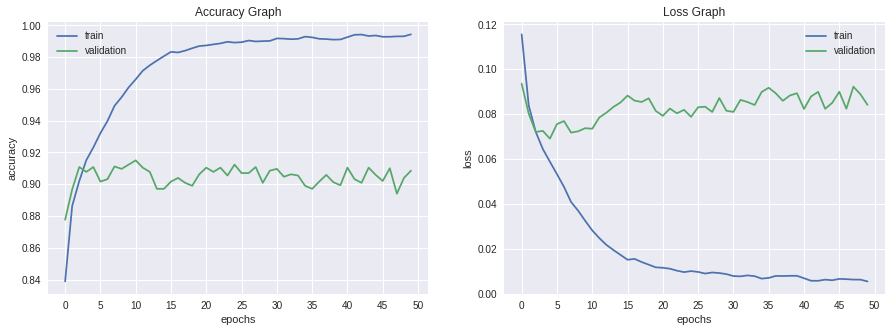

In [ ]:
import matplotlib.pyplot as plt
# Plots for training and testing process: loss and accuracy
plt.figure(figsize=(15, 5))

plt.subplot(1, 2 ,1)
plt.plot(train_acc)
plt.plot(valid_acc)
plt.xticks(np.arange(0, epochs+1, epochs/10))
plt.title('Accuracy Graph')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='best')

plt.subplot(1, 2, 2)
plt.plot(train_loss)
plt.plot(valid_loss)
plt.xticks(np.arange(0, epochs+1, epochs/10))
plt.title('Loss Graph')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='best')

plt.show()

In [ ]:
test_loss,test_acc = [],[]
p = 0
while p+batch_size <= len(x_test):
  x_test_batch = x_test[p:p+batch_size]
  y_test_batch = np.asarray(y_test[p:p+batch_size]).reshape(-1, 1)
  acct,lossest = session.run([accuracy,loss],feed_dict={x:x_test_batch,y_true:y_test_batch})
  p += batch_size
  test_acc.append(acct)
  test_loss.append(lossest)
  

In [ ]:
print('test_acc = {}%'.format(np.mean(test_acc)*100), ', test_loss = {}'.format(np.mean(test_loss)))

test_acc = 91.00610017776489% , test_loss = 0.08219404518604279
